<a href="https://colab.research.google.com/github/LJMfintech/Financial_Data_Analysis/blob/main/DataAnalysisHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wrds
!pip install numpy_financial

In [2]:
#코드를 작성하는데 필요한 도구들 끌어오기
import wrds
import numpy_financial as npf
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
#WRDS 연결
conn = wrds.Connection()

Enter your WRDS username [root]:leeskku2025
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


# 1번 문제

In [4]:
#WRDS에 있는 리스트들 확인 -> 리스트를 확인하여 필요한 데이터가 들어있는 항목을 찾아내야됨
lib_list = conn.list_libraries()
print(type(lib_list))
print(lib_list)

<class 'list'>
['aha_sample', 'ahasamp', 'audit', 'audit_audit_comp', 'audit_common', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all', 'boardex_trial', 'boardsmp', 'bvd_amadeus_trial', 'bvd_bvdbankf_trial', 'bvd_orbis_trial', 'bvdsamp', 'calcbench_trial', 'calcbnch', 'candid_samp', 'cboe', 'cboe_all', 'cboe_sample', 'cboesamp', 'cddsamp', 'ciq', 'ciq_capstrct', 'ciq_common', 'ciqsamp', 'ciqsamp_capstrct', 'ciqsamp_common', 'ciqsamp_keydev', 'ciqsamp_pplintel', 'ciqsamp_ratings', 'ciqsamp_transactions', 'ciqsamp_transcripts', 'cisdmsmp', 'columnar', 'comp', 'comp_execucomp', 'comp_global_daily', 'comp_na_daily_all', 'compsamp', 'compsamp_all', 'compsamp_snapshot', 'contrib', 'contrib_as_filed_financials', 'contrib_ceo_turnover', 'contrib_char_returns', 'contrib_corporate_culture', 'contrib_general', 'contrib_global_factor', 'contrib_intangible_value', 'contrib_kpss', 'contrib_liva', 'crsp', 'crsp_a_indexes', 'crsp_a_stock', 'crsp_a_t

In [5]:
# comp 카테고리를 선택하고 위와 마찬가지로 comp 하위 리스트들을 확인. company의 줄임말이라 대부분 회사의 정보가 여기 있을 것 같다는 추측으로 선택
conn.list_tables(library='comp')

['aco_amda',
 'aco_imda',
 'aco_indfnta',
 'aco_indfntq',
 'aco_indfntytd',
 'aco_indsta',
 'aco_indstq',
 'aco_indstytd',
 'aco_notesa',
 'aco_notesq',
 'aco_notessa',
 'aco_notesytd',
 'aco_pnfnda',
 'aco_pnfndq',
 'aco_pnfndytd',
 'aco_pnfnta',
 'aco_pnfntq',
 'aco_pnfntytd',
 'aco_transa',
 'aco_transq',
 'aco_transsa',
 'aco_transytd',
 'adsprate',
 'asec_amda',
 'asec_imda',
 'asec_notesa',
 'asec_notesq',
 'asec_transa',
 'asec_transq',
 'bank_aacctchg',
 'bank_adesind',
 'bank_afnd1',
 'bank_afnd2',
 'bank_afnddc1',
 'bank_afnddc2',
 'bank_afntind',
 'bank_funda',
 'bank_funda_fncd',
 'bank_fundq',
 'bank_fundq_fncd',
 'bank_iacctchg',
 'bank_idesind',
 'bank_ifndq',
 'bank_ifndytd',
 'bank_ifntq',
 'bank_ifntytd',
 'bank_names',
 'bank_namesq',
 'chars',
 'co_aacctchg',
 'co_aaudit',
 'co_acthist',
 'co_adesind',
 'co_adjfact',
 'co_afnd1',
 'co_afnd2',
 'co_afnddc1',
 'co_afnddc2',
 'co_afntind1',
 'co_afntind2',
 'co_ainvval',
 'co_amkt',
 'co_busdescl',
 'co_cotype',
 'co_f

In [6]:
# comp 하위 리스트중 g_secm에서 이후의 문제들을 해결할 때 필요한 변수들을 가장 많이 포함하고 있다고 생각해 현재는 g_secm 테이블로 데이터 추출 진행중
# g_secm = "Global Sector Company Master" 테이블을 의미합니다. 이 테이블은 각 기업의 국가, 섹터, 산업 등 국가별·섹터별 특성을 정의 (출차: 챗지피)
country = conn.get_table(library='comp', table='g_secm', obs = 5)
country

,gvkey,iid,datadate,conm,ajexm,ajpm,isalrt,cshtrm,curcdm,prccm,...,dvpspm_fn,dvpsxm_fn,epf,exchg,isin,secstat,sedol,tpci,fic,loc
0,000005,01W,2006-01-31,<NA>,1.0,1.0,<NA>,<NA>,USD,10864.86,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,000005,01W,2006-02-28,<NA>,1.0,1.0,<NA>,<NA>,USD,10993.41,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,000005,01W,2006-03-31,<NA>,1.0,1.0,<NA>,<NA>,USD,11109.32,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,000005,01W,2006-04-30,<NA>,1.0,1.0,<NA>,<NA>,USD,11367.14,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,000005,01W,2006-05-31,<NA>,1.0,1.0,<NA>,<NA>,USD,11168.31,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
# a: 월별 기업 데이터
# b: 기업명 및 국가
# 기업(gvkey) 기준으로 매칭

data_set = conn.raw_sql("""select gvkey, iid, datadate, conm, ajexm, ajpm, cshtrm, curcdm, prccm, prchm, prclm, dvpspm, dvpsxm, fic

                          from comp.g_secm
                          where fic IN('GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR')
                          and datadate between '2020-03-01' and '2024-12-31'
                          """)
print(data_set.shape)



(1546685, 14)


In [8]:
data_set.head()

,gvkey,iid,datadate,conm,ajexm,ajpm,cshtrm,curcdm,prccm,prchm,prclm,dvpspm,dvpsxm,fic
0,001932,01W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,167128.582,GBP,27.59,32.445,23.82,0.0,0.526,GBR
1,001932,02W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,38145.786,ZAR,598.66,645.17,498.0,0.0,10.789,GBR
2,001932,03W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,57.605,EUR,30.98,37.265,25.65,0.0,0.579,GBR
3,001932,04W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,23539.937,GBP,27.385,32.53,23.685,0.0,0.526,GBR
4,001932,07W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,<NA>,CHF,34.44,34.44,34.44,0.0,0.616,GBR


데이터 클리닝

In [9]:
# inf, -inf를 NaN으로 변환
data_set = data_set.replace([np.inf, -np.inf], np.nan)

# Fill the missing values with the last value available in the dataset.
data_set=data_set.fillna(method='ffill') #ffill: forward fill으로, NA값을 직전 관측치로 대체

# 그래도 남은 결측치(첫 관측치 등)는 0으로 대체
data_set = data_set.fillna(0)

# Drop the rows containing NA
data_set= data_set.dropna(axis=0) # NA값 있는 행 삭제

# Fill na with 0
#dataset.fillna('0')
data_set.head()

/tmp/ipython-input-299111576.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_set=data_set.fillna(method='ffill') #ffill: forward fill으로, NA값을 직전 관측치로 대체


,gvkey,iid,datadate,conm,ajexm,ajpm,cshtrm,curcdm,prccm,prchm,prclm,dvpspm,dvpsxm,fic
0,001932,01W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,167128.582,GBP,27.59,32.445,23.82,0.0,0.526,GBR
1,001932,02W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,38145.786,ZAR,598.66,645.17,498.0,0.0,10.789,GBR
2,001932,03W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,57.605,EUR,30.98,37.265,25.65,0.0,0.579,GBR
3,001932,04W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,23539.937,GBP,27.385,32.53,23.685,0.0,0.526,GBR
4,001932,07W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,23539.937,CHF,34.44,34.44,34.44,0.0,0.616,GBR


In [10]:
# 2. 유효 기간과 주요 컬럼 확인
num_cols = ['prccm', 'prchm', 'prclm', 'dvpspm', 'dvpsxm', 'ajexm', 'ajpm', 'cshtrm']

# 3. inf, -inf를 NaN으로 변환
data_set = data_set.replace([np.inf, -np.inf], np.nan)

# 4. 월별·국가별 평균으로 1차 결측치 대체
data_set[num_cols] = data_set.groupby(['datadate', 'fic'])[num_cols].transform(lambda x: x.fillna(x.mean()))

# 5. 남은 결측치를 전체 전체 평균(혹은 중앙값)으로 2차 대체
for col in num_cols:
    overall_mean = data_set[col].mean()
    data_set[col] = data_set[col].fillna(overall_mean)

# 6. 그래도 남은 결측치는 직후값(bfill) 활용
data_set[num_cols] = data_set[num_cols].fillna(method='bfill')

# 7. 여전히 남아있다면 최종 0으로 대체
data_set[num_cols] = data_set[num_cols].fillna(0)

# 8. 정렬
data_set = data_set.sort_values(['gvkey', 'datadate'])

/tmp/ipython-input-3375457960.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_set[num_cols] = data_set[num_cols].fillna(method='bfill')


In [11]:
print('Null Values =', data_set.isnull().values.any())

Null Values = False


데이터 변환

# 2번 문제

In [22]:
data_set = data_set.sort_values(['gvkey', 'datadate'])

# 2. 월별 수익률 계산 (조정종가 + 배당)
data_set['prccm_adj'] = data_set['prccm'] * data_set['ajexm'] # 조정종가 계산
data_set['prccm_adj_prev'] = data_set.groupby('gvkey')['prccm_adj'].shift(1) # 이전 월의 조정종가
data_set['div'] = data_set['dvpsxm'].fillna(0) if 'dvpsxm' in data_set.columns else 0 # 배당금 dvpsxm이 있으면 채워넣고 없으면 0 처리
data_set['ret'] = (data_set['prccm_adj'] + data_set['div']) / data_set['prccm_adj_prev'] - 1 # 최종 수익률 ret = (이번달 조정종가 + 배당금) / 이전달 조정종가 - 1

# 3. 시가총액 계산 (주가 × 발행주식수, 예: shares_outstanding 변수가 cshtrm, csho 등으로 제공된다 가정)
if 'cshtrm' in data_set.columns:
    data_set['mktcap'] = data_set['prccm'] * data_set['cshtrm']  # cshtrm NA시, quarterly/annual 데이터를 병합해서 채워넣기 가능
else:
    data_set['mktcap'] = np.nan # 결측 우선 처리, 이후 필요변수 병합해야 함




###################
# inf, -inf를 NaN으로 변환
data_set = data_set.replace([np.inf, -np.inf], np.nan)

# Fill the missing values with the last value available in the dataset.
data_set=data_set.fillna(method='ffill') #ffill: forward fill으로, NA값을 직전 관측치로 대체

# 그래도 남은 결측치(첫 관측치 등)는 0으로 대체
data_set = data_set.fillna(0)


# Drop the rows containing NA
data_set= data_set.dropna(axis=0) # NA값 있는 행 삭제

# Fill na with 0
#dataset.fillna('0')
data_set.head()

########




# 4. 국가-월별 동등가중(EW) 수익률
ew_ret = data_set.groupby(['fic', 'datadate'])['ret'].mean().reset_index(name='ew_ret')

# 5. 국가-월별 시가총액가중(VW) 수익률
def vw_avg(x):
    valid = (x['mktcap'] > 0) & (x['ret'].notnull())
    return np.average(x.loc[valid, 'ret'], weights=x.loc[valid, 'mktcap']) if valid.any() else np.nan

vw_ret = data_set.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

def fillna_median_by_group(df, group_col, target_col):
    return df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.median()))

# ew_ret 결측치 대체
ew_ret['ew_ret'] = fillna_median_by_group(ew_ret, 'fic', 'ew_ret')

# vw_ret 결측치 대체
vw_ret['vw_ret'] = fillna_median_by_group(vw_ret, 'fic', 'vw_ret')





/tmp/ipython-input-379206229.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_set=data_set.fillna(method='ffill') #ffill: forward fill으로, NA값을 직전 관측치로 대체
/tmp/ipython-input-379206229.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = data_set.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')


In [23]:
# 6. 결과 출력/확인
print("기업별 월별 수익률 예시:")
# print(data_set[['gvkey', 'conm', 'datadate', 'ret']].head())
firm_monthly_ret = data_set.groupby(['gvkey', 'conm', 'datadate'])['ret'].mean().reset_index()
print(firm_monthly_ret.head())

print("기업별 시가총액 예시:")
# print(data_set[['gvkey', 'conm', 'datadate', 'mktcap']].head())
firm_monthly_mktcap = data_set.groupby(['gvkey', 'conm', 'datadate'])['mktcap'].sum().reset_index()
print(firm_monthly_mktcap.head())

print("\n국가별 EW 월별 수익률 예시:")
print(ew_ret.head())

print("\n국가별 VW 월별 수익률 예시:")
print(vw_ret.head())

기업별 월별 수익률 예시:
    gvkey                      conm    datadate       ret
0  001932  BRITISH AMER TOBACCO PLC  2020-03-31  4.064652
1  001932  BRITISH AMER TOBACCO PLC  2020-04-30  4.185359
2  001932  BRITISH AMER TOBACCO PLC  2020-05-31   3.93544
3  001932  BRITISH AMER TOBACCO PLC  2020-06-30  3.906054
4  001932  BRITISH AMER TOBACCO PLC  2020-07-31  4.271441
기업별 시가총액 예시:
    gvkey                      conm    datadate           mktcap
0  001932  BRITISH AMER TOBACCO PLC  2020-03-31  28904575.032065
1  001932  BRITISH AMER TOBACCO PLC  2020-04-30   21127570.79743
2  001932  BRITISH AMER TOBACCO PLC  2020-05-31    11239254.2064
3  001932  BRITISH AMER TOBACCO PLC  2020-06-30   15676088.92079
4  001932  BRITISH AMER TOBACCO PLC  2020-07-31  16047134.219065

국가별 EW 월별 수익률 예시:
   fic    datadate        ew_ret
0  AUS  2020-03-31  67726.172864
1  AUS  2020-04-30       6.15173
2  AUS  2020-05-31     72.757477
3  AUS  2020-06-30      5.460882
4  AUS  2020-07-31    367.315379

국가별 VW 월별 수익률 예시

In [24]:
print('Null Values =', data_set.isnull().values.any())

Null Values = False


In [25]:
# 프랑스 국가코드: 'FRA'
fr_eew_ret = ew_ret[ew_ret['fic'] == 'FRA'].copy()
fr_vw_ret = vw_ret[vw_ret['fic'] == 'FRA'].copy()

print("\n프랑스 EW 월별 수익률 예시:")
print(fr_eew_ret.head())

print("\n프랑스 VW 월별 수익률 예시:")
print(fr_vw_ret.head())


프랑스 EW 월별 수익률 예시:
     fic    datadate  ew_ret
232  FRA  2020-03-31     NaN
233  FRA  2020-04-30     NaN
234  FRA  2020-05-31     NaN
235  FRA  2020-06-30     NaN
236  FRA  2020-07-31     NaN

프랑스 VW 월별 수익률 예시:
     fic    datadate     vw_ret
232  FRA  2020-03-31  20.482207
233  FRA  2020-04-30  20.482207
234  FRA  2020-05-31  20.482207
235  FRA  2020-06-30  20.482207
236  FRA  2020-07-31  20.482207


/tmp/ipython-input-3518907633.py:15: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3518907633.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3518907633.py:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3518907633.py:15: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3518907633.py:15: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning

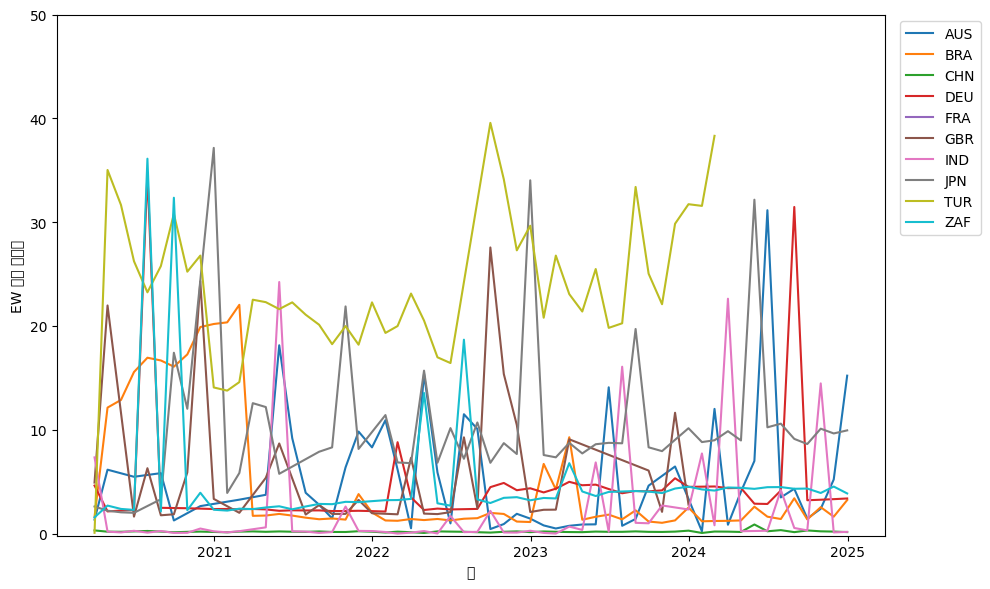

In [ ]:
# datadate가 날짜형이면 변환, 아니면 생략
ew_ret['datadate'] = pd.to_datetime(ew_ret['datadate'], errors='coerce')

# 0.2 이상/이하 극단값 제외한 데이터만 선택
plot_data = ew_ret[ew_ret['ew_ret'].abs() < 50]

plt.figure(figsize=(10,6))
for fic in plot_data['fic'].unique():
    temp = plot_data[plot_data['fic'] == fic]
    plt.plot(temp['datadate'], temp['ew_ret'], label=fic)
plt.ylim(-0.2, 50)           # y축 제한 필요하면 조정(극단값이 이미 제거되어 -0.2~0.2로 주로 사용)
plt.ylabel("EW 월별 수익률")
plt.xlabel("월")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()



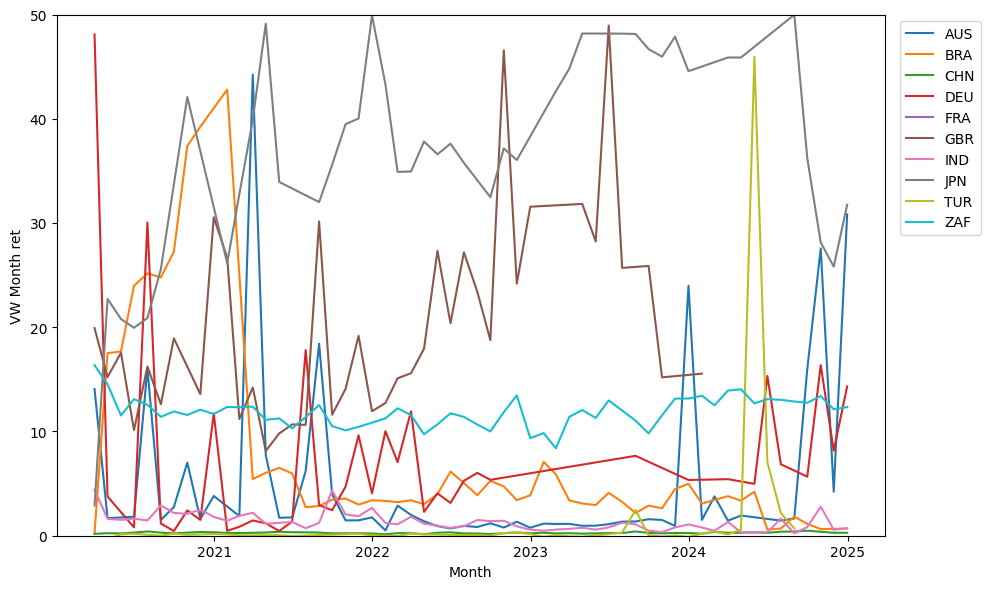

In [ ]:
# datadate가 날짜형이면 변환
vw_ret['datadate'] = pd.to_datetime(vw_ret['datadate'], errors='coerce')

# 극단치 제거: VW 수익률이 -0.2~0.2 범위만 사용
plot_data = vw_ret[vw_ret['vw_ret'].abs() < 50]

plt.figure(figsize=(10,6))
for fic in plot_data['fic'].unique():
    temp = plot_data[plot_data['fic'] == fic]
    plt.plot(temp['datadate'], temp['vw_ret'], label=fic)
plt.ylim(0, 50)
plt.ylabel("VW Month ret")
plt.xlabel("Month")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()

단순히 수익률 공식으로 돌렸더니 프랑스 기업에서는 배당금이 없어서 NaN값이 떴다. 그래서 배당금이 없는 경우 배당금 없이 수익률을 계산하였다.

In [ ]:
ew_ret.to_csv('ew_ret_table.csv', index=False)
vw_ret.to_csv('vw_ret_table.csv', index=False)

In [ ]:
fra_data = data_set[data_set['fic'] == 'FRA']
fra_data.to_csv('fra_table.csv', index=False)

In [ ]:
country_list = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR']

for code in country_list:
    country_data = data_set[data_set['fic'] == code]
    print(f"\n{code} 데이터 샘플")
    print(country_data.head())
    # 필요 시 각 국가별로 파일 저장
    country_data.to_csv(f'{code}_data.csv', index=False)


GBR 데이터 샘플
    gvkey  iid    datadate                      conm  ajexm  ajpm      cshtrm  \
0  001932  01W  2020-03-31  BRITISH AMER TOBACCO PLC    1.0   1.0  167128.582   
1  001932  02W  2020-03-31  BRITISH AMER TOBACCO PLC    1.0   1.0   38145.786   
2  001932  03W  2020-03-31  BRITISH AMER TOBACCO PLC    1.0   1.0      57.605   
3  001932  04W  2020-03-31  BRITISH AMER TOBACCO PLC    1.0   1.0   23539.937   
4  001932  07W  2020-03-31  BRITISH AMER TOBACCO PLC    1.0   1.0   23539.937   

  curcdm   prccm   prchm   prclm  dvpspm  dvpsxm  fic  prccm_adj  \
0    GBP   27.59  32.445   23.82     0.0   0.526  GBR      27.59   
1    ZAR  598.66  645.17   498.0     0.0  10.789  GBR     598.66   
2    EUR   30.98  37.265   25.65     0.0   0.579  GBR      30.98   
3    GBP  27.385   32.53  23.685     0.0   0.526  GBR     27.385   
4    CHF   34.44   34.44   34.44     0.0   0.616  GBR      34.44   

   prccm_adj_prev     div        ret          mktcap  
0            <NA>   0.526       <NA> 

# 3번 문제

In [ ]:
# datadate 컬럼을 datetime 타입으로 변환 (중요!)
data_set['datadate'] = pd.to_datetime(data_set['datadate'])

# 새 컬럼 'period' 생성
def classify_period(date):
    if pd.Timestamp('2020-03-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'COVID-19 Crisis Period'
    elif pd.Timestamp('2022-01-01') <= date <= pd.Timestamp('2024-12-31'):
        return 'Post-crisis Recovery Period'
    else:
        return 'Other'

data_set['period'] = data_set['datadate'].apply(classify_period)

# 결과 예시
print(data_set[['datadate', 'period']].drop_duplicates().head(15))

# 필요시 각 구간별 데이터 분리도 가능
covid_period    = data_set[data_set['period'] == 'COVID-19 Crisis Period']
recovery_period = data_set[data_set['period'] == 'Post-crisis Recovery Period']

         datadate                  period
0      2020-03-31  COVID-19 Crisis Period
23654  2020-04-30  COVID-19 Crisis Period
47299  2020-05-31  COVID-19 Crisis Period
71006  2020-06-30  COVID-19 Crisis Period
94795  2020-07-31  COVID-19 Crisis Period
118696 2020-08-31  COVID-19 Crisis Period
142688 2020-09-30  COVID-19 Crisis Period
166790 2020-10-31  COVID-19 Crisis Period
190990 2020-11-30  COVID-19 Crisis Period
215254 2020-12-31  COVID-19 Crisis Period
239774 2021-01-31  COVID-19 Crisis Period
264384 2021-02-28  COVID-19 Crisis Period
289108 2021-03-31  COVID-19 Crisis Period
314151 2021-04-30  COVID-19 Crisis Period
339295 2021-05-31  COVID-19 Crisis Period


In [ ]:
data_set.head()

,gvkey,iid,datadate,conm,ajexm,ajpm,cshtrm,curcdm,prccm,prchm,prclm,dvpspm,dvpsxm,fic,prccm_adj,prccm_adj_prev,div,ret,mktcap,period
0,001932,01W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,167128.582,GBP,27.59,32.445,23.82,0.0,0.526,GBR,27.59,<NA>,0.526,<NA>,4611077.57738,COVID-19 Crisis Period
1,001932,02W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,38145.786,ZAR,598.66,645.17,498.0,0.0,10.789,GBR,598.66,27.59,10.789,21.089489,22836356.24676,COVID-19 Crisis Period
2,001932,03W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,57.605,EUR,30.98,37.265,25.65,0.0,0.579,GBR,30.98,598.66,0.579,-0.947284,1784.6029,COVID-19 Crisis Period
3,001932,04W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,23539.937,GBP,27.385,32.53,23.685,0.0,0.526,GBR,27.385,30.98,0.526,-0.099064,644641.174745,COVID-19 Crisis Period
4,001932,07W,2020-03-31,BRITISH AMER TOBACCO PLC,1.0,1.0,23539.937,CHF,34.44,34.44,34.44,0.0,0.616,GBR,34.44,27.385,0.616,0.280117,810715.43028,COVID-19 Crisis Period


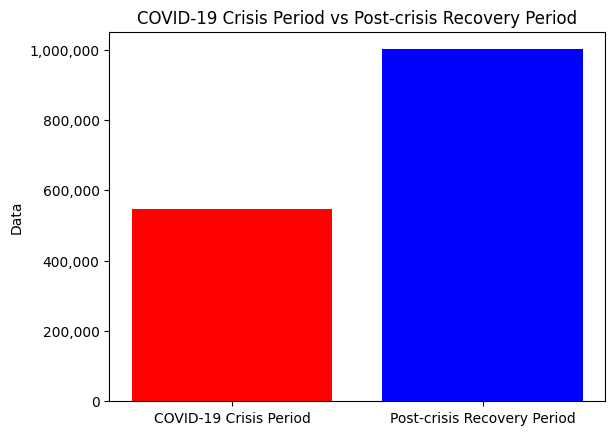

COVID-19 Crisis Period: 545,634개
Post-crisis Recovery Period: 1,001,051개


In [ ]:

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# 예시 데이터: 이미 covid_period, recovery_period가 존재한다고 가정
count_covid = len(covid_period)
count_recovery = len(recovery_period)

# 막대그래프에 사용할 데이터 이름과 카운트 정의
period_names = ['COVID-19 Crisis Period', 'Post-crisis Recovery Period']
period_counts = [count_covid, count_recovery]

fig, ax = plt.subplots()
ax.bar(period_names, period_counts, color=['red', 'blue'])
ax.set_title('COVID-19 Crisis Period vs Post-crisis Recovery Period')
ax.set_ylabel('Data')

# y축 숫자에 천 단위 콤마 표시
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

print(f"COVID-19 Crisis Period: {count_covid:,}개")
print(f"Post-crisis Recovery Period: {count_recovery:,}개")


# 4번 문제

In [ ]:
pd.set_option("display.precision", 3)
ew_ret.describe()



,datadate,ew_ret
count,580,580.0
mean,2022-08-15 12:24:49.655172352,<NA>
min,2020-03-31 00:00:00,<NA>
25%,2021-05-31 00:00:00,<NA>
50%,2022-08-15 12:00:00,<NA>
75%,2023-10-31 00:00:00,<NA>
max,2024-12-31 00:00:00,<NA>
std,NaN,<NA>


In [ ]:
print(data_set.columns)

Index(['gvkey', 'iid', 'datadate', 'conm', 'ajexm', 'ajpm', 'cshtrm', 'curcdm',
       'prccm', 'prchm', 'prclm', 'dvpspm', 'dvpsxm', 'fic', 'prccm_adj',
       'prccm_adj_prev', 'div', 'ret', 'mktcap', 'period'],
      dtype='object')


In [ ]:
data_set['ew_ret'].head()
data_set['ew_ret'].dtype

KeyError: 'ew_ret'

In [ ]:
# 10개국 리스트
country_list = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR']


# 10개국 데이터 필터링
data_10 = data_set[data_set['fic'].isin(country_list)]

# EW 수익률 계산
ew_ret = data_10.groupby(['fic', 'datadate'])['ret'].mean().reset_index(name='ew_ret')
# VW 수익률 계산 함수
def vw_avg(x):
    cond = (x['mktcap'] > 0) & x['ret'].notnull()
    if cond.any():
        return np.average(x.loc[cond,'ret'], weights=x.loc[cond,'mktcap'])
    else:
        return np.nan
vw_ret = data_10.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# 연월(Year-Month) 컬럼 추가 (datadate가 datetime 아니면 변환 필요)
data_10['datadate'] = pd.to_datetime(data_10['datadate'])
ew_ret['year_month'] = ew_ret['datadate'].dt.to_period('M')
vw_ret['year_month'] = vw_ret['datadate'].dt.to_period('M')

# 피벗(pivot)해서 국가별 row, 월별 수익률이 열이 되도록 변환
ew_pivot = ew_ret.pivot(index='fic', columns='year_month', values='ew_ret').reset_index()
vw_pivot = vw_ret.pivot(index='fic', columns='year_month', values='vw_ret').reset_index()

print("EW 수익률 (국가별 1행, 월별 열):")
print(ew_pivot.head(10))

print("\nVW 수익률 (국가별 1행, 월별 열):")
print(vw_pivot.head(10))

In [ ]:
from scipy.stats import skew, kurtosis

# 기존: country_list, data_10 등 기존 코드 활용

# 월별 수익률 생성 이후 추가할 summary 함수 정의
def calc_summary_stats(x):
    return pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'autocorr': x.autocorr(lag=1),
        'skewness': skew(x.dropna()),
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True)
    })

# 국가별 & 월별 수익률 계산 (기존 코드 참고)
ew_ret = data_10.groupby(['fic', 'datadate'])['ret'].mean().reset_index(name='ew_ret')
vw_ret = data_10.groupby(['fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# 그룹별 각 수익률의 summary statistics 계산
ew_stats = ew_ret.groupby('fic')['ew_ret'].apply(calc_summary_stats).reset_index()
vw_stats = vw_ret.groupby('fic')['vw_ret'].apply(calc_summary_stats).reset_index()

print("EW 수익률 국가별 summary stats:")
print(ew_stats.head(20))

print("VW 수익률 국가별 summary stats:")
print(vw_stats.head(20))

# 5번 문제

In [ ]:
# Developed/Emerging 국가 리스트
developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

data_10['group'] = data_10['fic'].apply(
    lambda x: 'Developed' if x in developed else ('Emerging' if x in emerging else np.nan))
filtered = data_10[data_10['group'].notnull()]

# EW 수익률 계산 (datadate별)
ew_ret = filtered.groupby(['group', 'fic', 'datadate'], as_index=False)['ret'].mean()
ew_ret = ew_ret.rename(columns={'ret': 'ew_ret'})

# VW 수익률 계산 (datadate별)
def vw_avg(x):
    cond = (x['mktcap'] > 0) & x['ret'].notnull()
    if cond.any():
        return np.average(x.loc[cond, 'ret'], weights=x.loc[cond, 'mktcap'])
    else:
        return np.nan

vw_ret = filtered.groupby(['group', 'fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# ---- summary statistics 함수 정의 (agg 활용) ---- #
summary_funcs = {
    'mean': 'mean',
    'median': 'median',
    'std': 'std',
    'min': 'min',
    'max': 'max',
    'autocorr': lambda x: x.autocorr(lag=1) if len(x.dropna()) > 1 else np.nan,
    'skewness': lambda x: skew(x.dropna()) if len(x.dropna()) > 2 else np.nan,
    'excess_kurtosis': lambda x: kurtosis(x.dropna(), fisher=True) if len(x.dropna()) > 3 else np.nan
}

ew_stats = ew_ret.groupby(['group', 'fic'])['ew_ret'].agg(**summary_funcs).reset_index()
vw_stats = vw_ret.groupby(['group', 'fic'])['vw_ret'].agg(**summary_funcs).reset_index()

ew_stats = ew_stats.replace([np.inf, -np.inf], np.nan).dropna() #inf, -inf 값을 NaN으로 대체 후 Nan 전체 제거
vw_stats = vw_stats.replace([np.inf, -np.inf], np.nan).dropna()

print("EW summary 국가별 샘플", ew_stats.head())
print("VW summary 국가별 샘플", vw_stats.head())

# 그룹별 평균 summary stats (Developed/Emerging)
ew_stats_grp = ew_stats.groupby('group').mean(numeric_only=True)
vw_stats_grp = vw_stats.groupby('group').mean(numeric_only=True)
print("EW 그룹별 평균 summary stats:")
print(ew_stats_grp)
print("VW 그룹별 평균 summary stats:")
print(vw_stats_grp)

# 6번 문제

In [ ]:
# 국가, 월별 수익률 피벗테이블 생성
pivot = data_10.pivot_table(index='datadate', columns='fic', values='ret')


# 기간 구분
periods = {
    'covid_crisis': ('2020-03', '2021-12'),
    'post_recovery': ('2022-01', '2024-12')
}

developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

corr_matrices = {}
for label, (start, end) in periods.items():
    mask = (pivot.index >= start) & (pivot.index <= end)
    corr_matrices[label] = pivot.loc[mask].corr()
    print(f"\n[{label} 기간 국가별 상관행렬]:")
    print(corr_matrices[label])

    dev_corr = corr_matrices[label].loc[developed, developed]
    emg_corr = corr_matrices[label].loc[emerging, emerging]

    dev_vals = dev_corr.values[np.triu_indices(len(developed), 1)]
    emg_vals = emg_corr.values[np.triu_indices(len(emerging), 1)]

    print(f"[{label}] 선진국 평균 상관계수: {np.nanmean(dev_vals):.3f}")
    print(f"[{label}] 신흥국 평균 상관계수: {np.nanmean(emg_vals):.3f}")

# 7번 문제

In [ ]:
def summary_func(x):
    result = pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'skewness': skew(x.dropna()) if len(x.dropna()) > 2 else 0,
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True) if len(x.dropna()) > 3 else 0
    })
    return result.fillna(0)  # 계산한 시리즈에서도 nan을 0으로 대체

data_10['datadate'] = pd.to_datetime(data_10['datadate'])
data_10['period'] = None
data_10.loc[(data_10['datadate'] >= '2020-03-01') & (data_10['datadate'] <= '2021-12-31'), 'period'] = 'COVID-19'
data_10.loc[(data_10['datadate'] >= '2022-01-01') & (data_10['datadate'] <= '2024-12-31'), 'period'] = 'Recovery'
data_period = data_10[data_10['period'].notnull()]

# 국가별
country_stats = data_period.groupby('fic')['ret'].apply(summary_func).unstack().reset_index()
country_stats = country_stats.fillna(0)
print("국가별 summary statistics")
print(country_stats)

# 기간별
period_stats = data_period.groupby('period')['ret'].apply(summary_func).unstack().reset_index()
period_stats = period_stats.fillna(0)
print("\n기간별 summary statistics")
print(period_stats)

# 그룹별
group_stats = data_period.groupby('group')['ret'].apply(summary_func).unstack().reset_index()
group_stats = group_stats.fillna(0)
print("\n그룹별 summary statistics")
print(group_stats)

In [ ]:
# GBR, CHN 각각의 수익률 데이터 준비 (inf/nan 제거)
gbr_ret = data_10[data_10['fic'] == 'GBR']['ret']
gbr_ret = gbr_ret.replace([np.inf, -np.inf], np.nan).dropna()

chn_ret = data_10[data_10['fic'] == 'CHN']['ret']
chn_ret = chn_ret.replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(gbr_ret, bins=20, color='steelblue')
plt.title('GBR (Developed) Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(chn_ret, bins=20, color='orangered')
plt.title('CHN (Emerging) Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()